In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import hashlib
from scipy.special import factorial,gamma
%matplotlib inline

## 1.1 高维高斯分布
<img src='image/norm.png' />

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


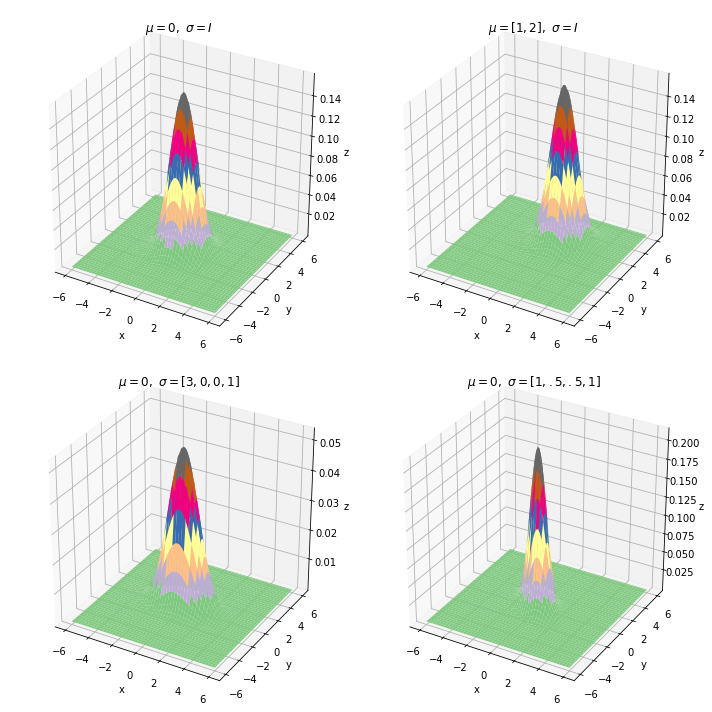

In [41]:
def drawNormDistribution(fig,X,Y,Z,index):
    ax=fig.add_subplot(index,projection='3d')
    ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap=cm.Accent)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
X,Y=np.mgrid[-6:6:100j,-6:6:100j]
fig=plt.figure(figsize=(10,10))
#标准正太分布
Z=(0.5/np.pi)*np.exp(-0.5*(X**2+Y**2))
drawNormDistribution(fig,X,Y,Z,221)
plt.title(r'$ \mu=0,\ \sigma=I$')

# 正太分布,u=1,2
Z=(0.5/np.pi)*np.exp(-0.5*((X-1)**2+(Y-2)**2))
drawNormDistribution(fig,X,Y,Z,222)
plt.title(r'$\mu=[1,2],\ \sigma=I$')
# cov=[3 0,0 1]
Z=(0.5/np.pi/3)*np.exp(-((X**2)/3+Y**2))
drawNormDistribution(fig,X,Y,Z,223)
plt.title(r'$ \mu=0,\ \sigma=[3,0,0,1]$')

# cov=[1 0.5,0.5 1],inv(cov)=array([[ 1.33333333, -0.66666667],
#        [-0.66666667,  1.33333333]]),所以副向关
Z=(0.5/np.pi/0.75)*np.exp(-(X**2+Y**2+X*Y))
drawNormDistribution(fig,X,Y,Z,224)
plt.title(r'$ \mu=0,\ \sigma=[1,.5,.5,1]$')
plt.tight_layout()
fig.show()

(30, 30)
样本总数: 80.0


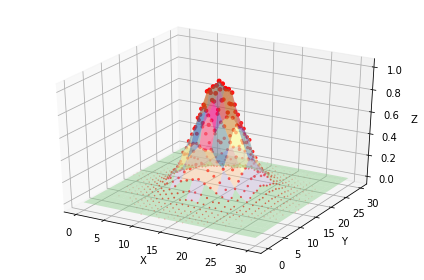

In [38]:
N=100000
d=np.random.randn(N,2)
density,edges=np.histogramdd(d,bins=[30,30])
density/=density.max()
print(density.shape)
print('样本总数:',np.sum(density)) #样本总数
X,Y=np.mgrid[0:30:30j,0:30:30j]
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X,Y,density,c='r',s=15*density,marker='o')
ax.plot_surface(X,Y,density,cmap=cm.Accent,rstride=2,cstride=2,alpha=0.4,lw=0.75)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()

## 2.1 MD5(128位)/SHA1(160位)

In [12]:
s='This is a sentence,and this is another sentence'
md5=hashlib.sha1()
md5.update(s.encode('utf-8'))
md5str=md5.hexdigest()
print(len(md5str)) #128位数
print(md5str)

40
d7b25b98035a32b57e3f7af06df97fcac9f63b99


In [43]:
a=np.array([[1,.5],[.5,1]])
np.linalg.inv(a)

array([[ 1.33333333, -0.66666667],
       [-0.66666667,  1.33333333]])

## 3.2 gamma 函数分布

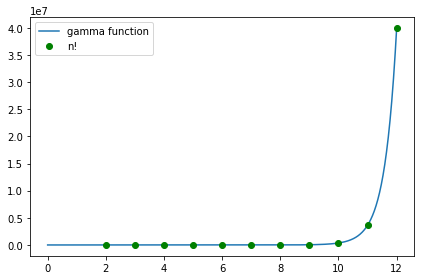

In [70]:
N=12
x=np.linspace(0.001,N,1000)
n=np.arange(1,N)
f_gamma=gamma(x)
f_factorial=factorial(n)
fig=plt.figure()
plt.plot(x,f_gamma,label='gamma function')
plt.plot(n+1,f_factorial,'go',label='n!')
plt.legend(loc='upper left')
plt.tight_layout()

In [61]:
gamma(9)

40320.0

In [62]:
factorial(8)

array(40320.)